In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
graph = tf.Graph()

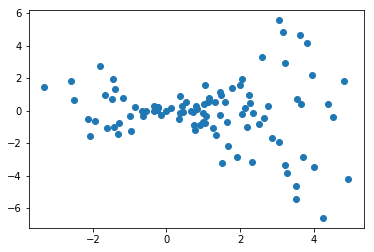

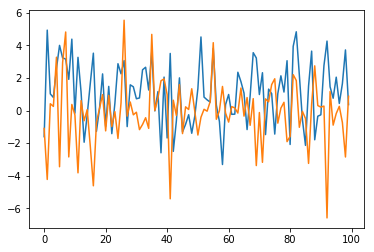

48.3002


In [3]:
with graph.as_default():
    
    # Create some random data:
    xs = np.random.normal(1, 2, 100)
    ys = np.asarray(np.random.randn(len(xs)) * xs)
    
    with tf.name_scope("Input_placeholder"):
        # Define our inpute node as place holder:
        a = tf.placeholder(tf.float32, None, name="a")
        
    with tf.name_scope("Middle_section"):
        # Defining node 'b':
        b = tf.reduce_prod(a, name="prod_b")
        
        # Defining the next two nodes in our graph:
        c = tf.reduce_mean(a)
        
        # Define the sum reducer node for a:
        d = tf.reduce_sum(a, name="sum_a")
        
        #This last line defines the final node in our graph
        e = tf.add(b,c, name="add_d")
        
    with tf.name_scope("Final_node"):
        # Create our final "multiply" node:
        f = tf.multiply(e,d, name="final_multiply_node")
        
# To run we have to add the two extra lines or run them in the shell:
sess = tf.InteractiveSession(graph=graph)
init = sess.run(f, feed_dict={a: [xs,ys]})

# Plotting Section:
plt.figure(1)
plt.scatter(xs,ys)
plt.pause(1)

plt.figure(2)
plt.plot(xs), plt.plot(ys)
plt.pause(2)

# Display the final result:
print (init)

In [4]:
# To create the graph:
sess.graph.as_graph_def()
file_writer = tf.summary.FileWriter('./', sess.graph)

# We clean up before we exit
file_writer.close()
sess.close()